### Describe el conjunto de datos y extrae algunas conclusiones de las variables y su distribución.

In [1]:
#import sklearn.datasets.load_wine
import numpy as np
from sklearn import datasets
#import plotly as py

wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [2]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [3]:
import pandas as pd

df = pd.DataFrame(data=wine['data'], columns=wine['feature_names']) 
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
from pandas.plotting import scatter_matrix

colors = {'coral', 'y', 'rebeccapurple' }

In [6]:
scatter_matrix(df, figsize = (12, 12), diagonal = 'hist', color=colors)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D45A1AF438>,
      dtype=object)

### Considera si debes normalizar o estandarizar las variables antes para usar un árbol de decisión. Razona tu elección

In [7]:
#normalizamos los datos:

from sklearn.preprocessing import Normalizer

# Normalizamos los datos para que estén centrados en 0 y con varianza 1
scaler = Normalizer()
df_values_normal = scaler.fit_transform(df.values)
df_normal = pd.DataFrame(data=df_values_normal, columns=wine['feature_names']) 
df_normal.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D45F087518>,
      dtype=object)

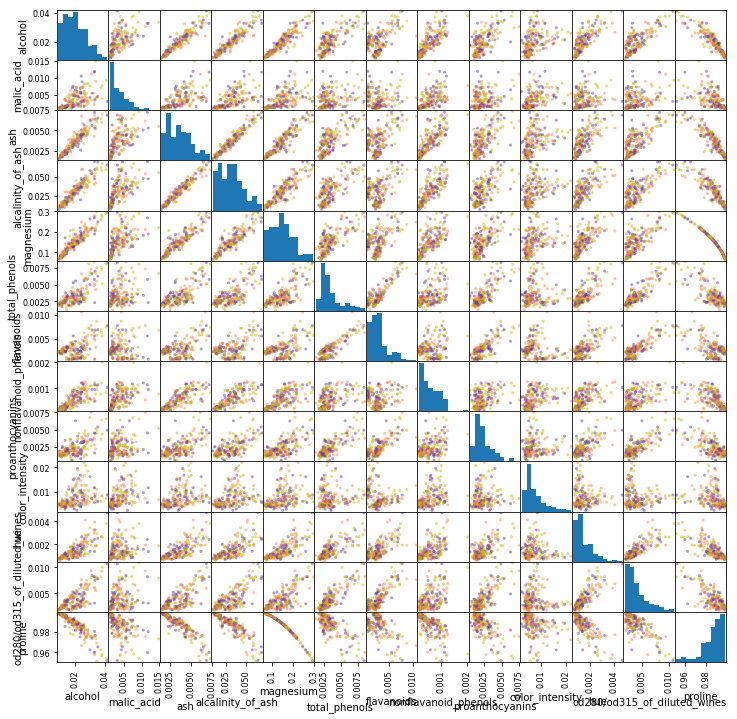

In [8]:
scatter_matrix(df_normal, figsize = (12, 12), diagonal = 'hist', color=colors)

In [9]:
# Estandarizamos los datos para que estén centrados en 0 y con varianza 1

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_values_std = scaler.fit_transform(df.values)
df_std = pd.DataFrame(data=df_values_std, columns=wine['feature_names']) 
df_std.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [10]:
df_std.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.841418e-15,2.444986e-16,-4.059175e-15,-7.110417e-17,-2.494883e-17,-1.955365e-16,9.443133e-16,-4.178929e-16,-1.540590e-15,-4.129032e-16,1.398382e-15,2.126888e-15,-6.985673e-17
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4629E5A90>,
      dtype=object)

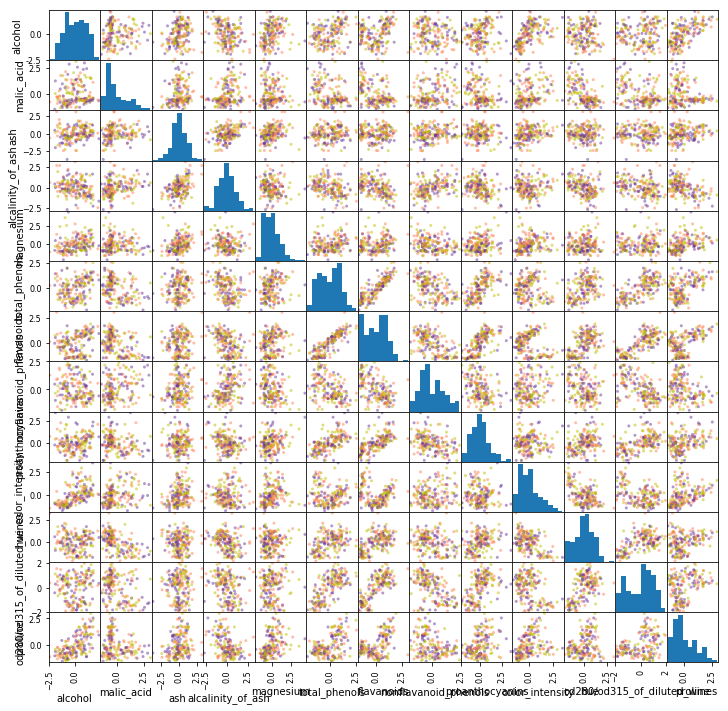

In [11]:
scatter_matrix(df_std, figsize = (12, 12), diagonal = 'hist', color=colors)

### Configura una partición de los datos con un 30% para el conjunto de test y estratificando la muestra.
### Analiza los resultados de entrenamiento y test que obtiene un árbol de decisión en función de la profundidad máxima del árbol. Pinta la evolución de la curva de aprendizaje.
### Determina el valor óptimo de dicho parámetro de manera razonada. 

In [12]:
import numpy as np

# Fijar generador de números aleatorios para obtener siempre los mismos resultados
np.random.seed(28)  

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Creamos un árbol de decisión con la configuración por defecto y lo entrenamos
clf = DecisionTreeClassifier()
clf = clf.fit(wine.data, wine.target)

In [13]:
# Si no está instalda la biblioteca graphviz

# exportar al fichero tree.dot
# se puede convertir a png con el siguiente comando en la consola:
# dot -Tpng tree.dot -o tree.png
export_graphviz(clf, out_file='tree.dot',
               feature_names=wine.feature_names,
               class_names=wine.target_names,
               filled=True, rounded=True,
               special_characters=True)  

<img  src="p9.2.1.png">Árbol de decisión óptimo para todos los datos</img >

# Entrenamiento y prueba

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Partimos el conjunto de datos en entrenamiento (70%) y prueba (30%)
# random_state es la semilla del generador de números aleatorios. Normalmente no se establece pero
# nosotros lo usamos para obtener siempre el mismo resultado.

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=0,
                                                    stratify=wine.target)
#print(X_train, X_test)

In [15]:
# Definición de una función
def trainDepth(depth, clf = None):
    # Repetimos el proceso pero modificando los parámetros de aprendizaje del árbol
    clf = clf or DecisionTreeClassifier(criterion="entropy",  # por defecto Gini pero podemos cambiar a entropía
                             max_depth=depth,          # profundidad máxima del árbol
                             min_samples_split=2,  # mínimo de muestras en el nodo para seguir dividiéndolo
                             random_state=0)
    clf = clf.fit(X_train, y_train)

# Calculamos la precisión del modelo de entrenamiento y de test
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    export_graphviz(clf, out_file='tree train depth'+str(depth)+'.dot',
               feature_names=wine.feature_names,
               class_names=wine.target_names,
               filled=True, rounded=True,
               special_characters=True) 
    return (train_accuracy, test_accuracy)

In [16]:
# los bucles for permiten recorrer estructuras de datos
for x in range(1, 10):
    train_accuracy, test_accuracy = trainDepth(x)
    print('Iteración número ',x,train_accuracy, test_accuracy)

Iteración número  1 0.6290322580645161 0.5555555555555556
Iteración número  2 0.967741935483871 0.9629629629629629
Iteración número  3 0.9919354838709677 0.9814814814814815
Iteración número  4 1.0 0.9444444444444444
Iteración número  5 1.0 0.9444444444444444
Iteración número  6 1.0 0.9444444444444444
Iteración número  7 1.0 0.9444444444444444
Iteración número  8 1.0 0.9444444444444444
Iteración número  9 1.0 0.9444444444444444


<img  src="p9.2.2.png">Árbol óptimo para el conjunto de entrenamiento seleccionado</img >

#### De aquí deducimos que, fijado un conjunto de entrenamiento, a partir de la cuarta iteración el algoritmo se estabiliza, eso es, se obtiene un árbol óptimo para el conjunto de entrenamiento.

###### Nota: 
Esto es dependiente de la aleatoriedad asociada al desorden de los datos en wine. En otros órdenes aleatorios (eliminando random_state=0) hemos necesitado realizar hasta una iteración más.

En consecuencia hemos decidido decir que una cota superior de la convergencia del algoritmo es 5 iteraciones para este conjunto de datos.

In [17]:
from sklearn.model_selection import cross_validate

train_accuracy = []
test_accuracy = []

max_depths = range(1, 10)
for md in max_depths: 
    # Entrenar y validar
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2,random_state=0)
    scores = cross_validate(clf, df_std, wine.target, scoring='accuracy', cv=10, return_train_score=True)
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

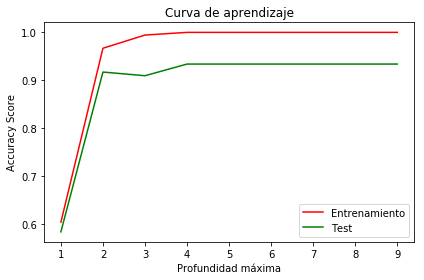

In [18]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Entrenamiento")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Profundidad máxima"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

Por tanto, deducimos que la profundidad en la que la profundidad del árbol de decisión es óptima es 2, que es el primer valor tal que a partir de él el árbol de decisión asociado a un conjunto de entrenamiento arbitario sobreaprende y al confrontarlo frente al conjunto de test, se empeora el resultado.

In [19]:
clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=2,random_state=0)
trainDepth(2,clf)

(1.0, 0.9444444444444444)

<img src="p9.2.3.png">El árbol de decisión de profundidad 2</img >

### Pinta el árbol de decisión óptimo que has encontrado y analiza lo siguiente: 

(Nota: el árbol de decisión óptimo está asociado a un conjunto de entrenamiento, no existe un único árbol de decisión óptimo para la partición de los datos exigida).


##### a) Interpreta someramente la pregunta que se realiza en el nodo raíz y los nodos hijos resultantes. Hazlo tanto en el contexto de un problema de clasificación (¿qué clases ha clasificado mejor?), como en el del problema representado en el conjunto de datos (¿qué sentido tiene esa pregunta y la clasificación que infiere dentro del problema?).

a.1) Con respecto al problema de clasificación.

En el nodo raíz se pregunta sobre los flavanoides, una variable continua, e intenta hacer una partición. Esta, para el conjunto de datos de entrenamiento es bastante eficaz, ya que crea dos nodos con bastante menos entropía, cada uno de ellos teniendo que discriminar sólamente entre dos clases.

Si el número de flavanoides no es mayor que $1.4$ se pregunta sobre la intensidad del color del vino. Esta pregunta es exhaustiva ya que realiza una partición limpia entre las dos clases.

En caso contrario, se pregunta sobre sobre la cantidad de prolinas (un tipo de aminoácidos). Aunque en ningún caso se pueda deducir alguna clase con exactitud, de los valores de entropía y los elementos muestrales, parece fácil predecir que en caso afirmativo los elementos serán de la primera clase, ya que la tasa de error es de sólo $2.33\%$ y en caso negativo asciende levemente hasta llegar al $6.98\%$.

Ya que dos de las hojas tienen entropía $0$, para los casos de test, el árbol funciona bastante bien. Sin embargo, para el $3.22\%$ de los valores se sigue fallando.

Utilizando los datos de test, la clase $2$ se infiere siempre bien, la clase $1$ un $94\%$ de las veces y la clase $0$ hasta un $97.56\%$.

a.2) Con respecto al problema representado en el conjunto de datos.

Al haber sólo tiene tres tipos de vinos, estudiar la cantidad de fenoles que tiene el vino si que puede ser determinante ya que distintas clases pueden tener distintos tipos de fenoles, como se indica <a href="https://www.vinetur.com/2017102045182/que-son-los-polifenoles-y-cuantos-tipos-hay.html">aquí</a> (los flavonoides son un tipo de fenol). Por ejemplo, con la misma clasificación, si el número de flavonoides polimerizados es menor que una cantidad, es claro que no puede ser tinto, ya que si tuviera uva roja, tendría que tener que una cantidad destcable de flavonoides polimerizados. En caso contrario, no podría ser blanco ya que los vinos blancos tienen una cantidad máxima de flavonoides, (aunque la presencia de vinos rosados hacen que este argumento no sea definitivo).

Si estamos en el nodo de entropía $0.562$, es claro que si la intensidad del color no se corresponde con un cierto umbral, es porque tiene demasiado valor de componente roja, lo que nos indicaría estar ante un vino rosado, en caso contrario, sería un vino blanco.

Por otra parte, si estamos en el hijo hermano a este, si preguntamos por la cantidad de prolina en cada vino y extrapolando los datos recogidos <a href="http://www.acenologia.com/ciencia72_02.htm">aquí</a> a cada variedad de uva, nos damos cuenta que en general los vinos tintos tienen mucha mas prolina que los blancos y, en consecuencia, tendrán algo más que los rosados. Por ello si el valor es muy pequeño se clasificarían como rosados, y en caso contrario como tintos, mas debido a que la extrapolación hecha a cada variedad es muy arbitraria y habría que estudiar cada caso contrario, es lo que hace que estos nodos no sean del todo exactos (su entropía no es nula).

Así, hemos propuesto una serie de clases razonables donde este árbol clasifica de manera coherente los diversos tipos de vinos, haciendo preguntas razonables y con sentido, tratando de estudiar si el árbol obtenido es acorde o no a la teoría propuesta. A la vista de los resultados, y teniendo en cuenta que nuestro conocimiento en viticultura es limitado y que la base de datos no es en absoluto extensa, consideramos que en este caso la respuesta es afirmativa.

##### b) Analiza si hay variables que sirven para discriminar entre algunas clases 

Del árbol óptimo seleccionado es claro que la variable flavanoids es condición suficiente para discrimar entre lo que es seguro que no es clase_0 y lo que aseguramos que no puede ser clase_2. Además, destacamos que la tupla (flavanoids,color_intensity) es condición suficiente para determinar con exactitud los individuos de tipo clase_2 (y algunos de clase_1).

###### c) Analiza si hay variables del conjunto de datos que no se han usado.

Todas las variables no mencionadas no se han usado, es decir: alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, nonflavanoid_phenols, proanthocyanins, hue y od280/od315_of_diluted_wines.

###### d) Identifica los nodos en los que existe mayor confusión. 

En este caso, los únicos nodos-hoja en el que hay confusión es el nodo con entropía $0.159$ y $0.365$ resepctivamente donde no se sabe discriminar con exactitud entre individuos de clase_0 y clase_1.

Por supuesto, en todos los nodos no hoja hay confusión, y la entropía del nodo raíz y sus nodo hijos son bastante elevadas ($1.5$ frente a casi $1$ en uno de ellos), lo que quiere decir que en los nodos-hoja en los que hay confusión, realmente no hay tanta como parece.

### Pinta un árbol de decisión sub-óptimo que sobreaprenda. Por ejemplo, el que se obtiene para un nivel más de profundidad máxima. Identifica los nodos nuevos.

<img  src="p9.2.4.png">Árbol óptimo para el conjunto de entrenamiento seleccionado (misma imagen que antes)</img > 

En este caso, el árbol óptimo tiene dos nuevos nodos (hoja) originados tras hacer una partición basada en el estudio de un tipo de aminoácidos que el vino contiene, la prolina.

Como se puede ver, este árbol es óptimo para el conjunto de entrenamiento.

In [20]:
from sklearn.metrics import confusion_matrix

y_test_predicted = clf.predict(X_test)
confusion_matrix(y_test, y_test_predicted)

array([[16,  2,  0],
       [ 0, 21,  0],
       [ 0,  1, 14]], dtype=int64)

In [21]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.88888889 0.11111111 0.        ]
 [0.         1.         0.        ]
 [0.         0.06666667 0.93333333]]


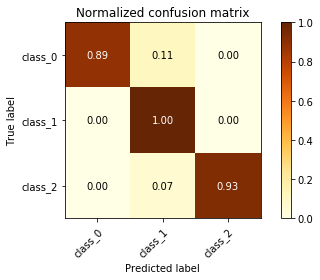

In [22]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
plot_confusion_matrix(y_test, y_test_predicted, wine.target_names, normalize=True,  cmap=plt.cm.YlOrBr)

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_predicted, target_names=wine.target_names))

             precision    recall  f1-score   support

    class_0       1.00      0.89      0.94        18
    class_1       0.88      1.00      0.93        21
    class_2       1.00      0.93      0.97        15

avg / total       0.95      0.94      0.94        54



###  Analiza también los valores de “precision” y “recall” (exhaustividad) para cada una de las clases 

Ya que el recall se define como: $$recall = \frac{\text{Verdaderos positivos}}{\text{Positivos}}$$
y el valor de precision como: $$precision = \frac{\text{Verdaderos positivos}}{\text{Verdaderos positivos y falsos positivos}}$$
observamos que, de los datos expuestos, el número de falsos negativos es en el caso peor (para la clase $0$) es del $11\%$ y en el caso mejor de un $0\%$ (para la clase $2$) y respecto al número de falsos positivos, este oscila entre un $12\%$ en la clase $1$ y un $0\%$ en el resto de clases.

De aquí obtenemos que los valores de $recall$ y $precision$ son muy parejos clase a clase, obtenemos que el árbol de decisión obtenido es óptimo en cuanto que se adapta bien a nuevos ejemplos, ya que en muy pocos casos se equivoca.

